In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
import os

In [17]:
base_dir = 'C:\\Users\\Santosh Simhadri\\OneDrive\\Desktop\\DataScience\\ML\\Coin Classification\\data'

image_height = 224
image_width = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    featurewise_std_normalization=True, # Normalize images
    samplewise_std_normalization=True
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    rotation_range=40,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
)

C:\Users\Santosh Simhadri\AppData\Roaming\Python\Python310\site-packages\keras\src\preprocessing\image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(
C:\Users\Santosh Simhadri\AppData\Roaming\Python\Python310\site-packages\keras\src\preprocessing\image.py:1469: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn(


In [18]:
batch_size=32

train_data_path =  base_dir + '/train'
valid_data_path = base_dir + '/validation'
test_data_path =  base_dir + '/test'

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    test_data_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    valid_data_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)
class_names = list(train_generator.class_indices.keys())

Found 6413 images belonging to 211 classes.
Found 844 images belonging to 211 classes.
Found 844 images belonging to 211 classes.


In [19]:
import json
with open(base_dir+'/cat_to_name.json', 'r') as json_file:
    cat_2_name = json.load(json_file)
cat_2_name['211']


'1 Dollar,US Dollar,usa'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

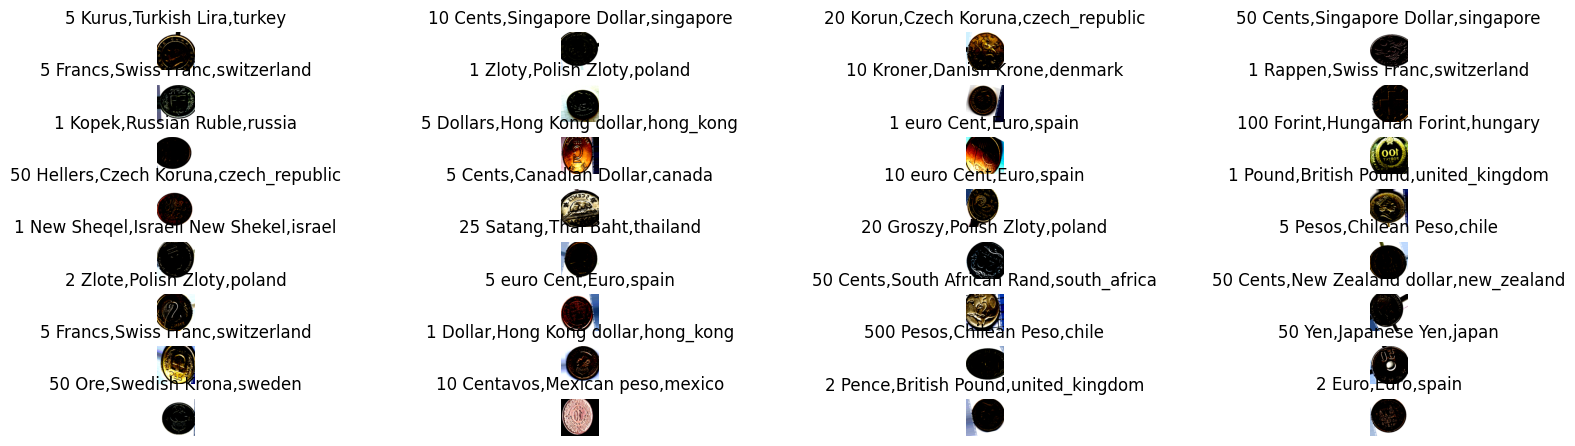

In [20]:
import matplotlib.pyplot as plt

images,label = train_generator.next()

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.2, hspace=0.4)
   
for i in range(batch_size):
    ax = plt.subplot(15,4,i+1)
    plt.imshow(images[i])
    plt.title(cat_2_name[class_names[label[i].argmax()]])
    plt.axis("off")


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

num_classes=211
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/15
200/200 [==============================] - 182s 898ms/step - loss: 4.0240 - accuracy: 0.2188 - val_loss: 3.0616 - val_accuracy: 0.3486
Epoch 2/15
200/200 [==============================] - 166s 832ms/step - loss: 2.2029 - accuracy: 0.5049 - val_loss: 2.3306 - val_accuracy: 0.5048
Epoch 3/15
200/200 [==============================] - 191s 957ms/step - loss: 1.6392 - accuracy: 0.6193 - val_loss: 1.9219 - val_accuracy: 0.5673
Epoch 4/15
200/200 [==============================] - 174s 871ms/step - loss: 1.3038 - accuracy: 0.6806 - val_loss: 1.8005 - val_accuracy: 0.6022
Epoch 5/15
200/200 [==============================] - 175s 875ms/step - loss: 1.0870 - accuracy: 0.7304 - val_loss: 1.6612 - val_accuracy: 0.6286
Epoch 6/15
200/200 [==============================] - 180s 900ms/step - loss: 0.9464 - accuracy: 0.7601 - val_loss: 1.6156 - val_accuracy: 0.6466
Epoch 7/15
200/200 [==============================] - 182s 908ms/step - loss: 0.8250 - accuracy: 0.7798 - val_loss: 1.6114 -

In [23]:
num_test = test_generator.samples
score = model.evaluate_generator(test_generator, steps=num_test // batch_size, verbose=1)
print('\n', 'Test accuracy:', score[1])

C:\Users\Santosh Simhadri\AppData\Local\Temp\ipykernel_10952\1870478819.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=num_test // batch_size, verbose=1)


26/26 [==============================] - 17s 650ms/step - loss: 1.3735 - accuracy: 0.7260

 Test accuracy: 0.7259615659713745


In [24]:
model_version=1
model.save(f"Models/Model{model_version}")

INFO:tensorflow:Assets written to: Models/Model1\assets


INFO:tensorflow:Assets written to: Models/Model1\assets


In [54]:
int_to_dir = {v: k for k, v in train_generator.class_indices.items()}

In [59]:
def get_prediction(img, real_label):
    # Preprocess the image directly without using img_to_array

    # Load and preprocess the image using the appropriate preprocessing functions
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)  # Convert PIL image to array

    # Normalize the image
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img = (img / 255.0 - mean) / std

    img_expand = np.expand_dims(img, axis=0)

    prediction = model.predict(img_expand)
    prediction_int = np.argmax(prediction)

    dir_int = int_to_dir[prediction_int]
    label_name = cat_2_name[str(dir_int)]
    
    print("Predicted: {}\nReal:      {}".format(label_name, cat_2_name[str(real_label)]))
    print()


In [63]:
for i in range(15):
    random_index = np.random.randint(0, len(test_generator.filenames))
    img = test_generator.filenames[random_index]
    img_path = test_data_path+"/" + img
    real_label = test_generator.filenames[random_index].split("\\")[0]
    

    get_prediction(img_path, real_label)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 33ms/step


<IPython.core.display.Javascript object>

Predicted: 1 New Sheqel,Israeli New Shekel,israel
Real:      1 New Sheqel,Israeli New Shekel,israel



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 40ms/step


<IPython.core.display.Javascript object>

Predicted: 20 Cents,South African Rand,south_africa
Real:      20 Cents,South African Rand,south_africa



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 30ms/step


<IPython.core.display.Javascript object>

Predicted: 5 Zlotych,Polish Zloty,poland
Real:      10 Rupees,Indian Rupee,india



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 38ms/step


<IPython.core.display.Javascript object>

Predicted: 1 Dollar,Australian dollar,australia
Real:      1 Dollar,Australian dollar,australia



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 30ms/step


<IPython.core.display.Javascript object>

Predicted: 2 New Sheqalim,Israeli New Shekel,israel
Real:      2 New Sheqalim,Israeli New Shekel,israel



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 39ms/step


<IPython.core.display.Javascript object>

Predicted: 2 Rubles,Russian Ruble,russia
Real:      5 Kopeks,Russian Ruble,russia



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 32ms/step


<IPython.core.display.Javascript object>

Predicted: 10 Baht,Thai Baht,thailand
Real:      10 Baht,Thai Baht,thailand



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 27ms/step


<IPython.core.display.Javascript object>

Predicted: 2 New Sheqalim,Israeli New Shekel,israel
Real:      2 New Sheqalim,Israeli New Shekel,israel



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 37ms/step


<IPython.core.display.Javascript object>

Predicted: 5 Jiao,Chinese Yuan Renminbi,china
Real:      50 Cents,South African Rand,south_africa



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 27ms/step


<IPython.core.display.Javascript object>

Predicted: 5 Rand,South African Rand,south_africa
Real:      5 Rand,South African Rand,south_africa



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 36ms/step


<IPython.core.display.Javascript object>

Predicted: 50 Paise,Indian Rupee,india
Real:      25 Paise,Indian Rupee,india



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 32ms/step


<IPython.core.display.Javascript object>

Predicted: 1 Cent,US Dollar,usa
Real:      5 Dollars,Singapore Dollar,singapore



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 41ms/step


<IPython.core.display.Javascript object>

Predicted: 20 Cents,New Zealand dollar,new_zealand
Real:      20 Cents,New Zealand dollar,new_zealand



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 44ms/step


<IPython.core.display.Javascript object>

Predicted: 1 Dollar,Canadian Dollar,canada
Real:      10 Cents,Canadian Dollar,canada



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 40ms/step


<IPython.core.display.Javascript object>

Predicted: 1 Dollar,Hong Kong dollar,hong_kong
Real:      1 Dollar,Hong Kong dollar,hong_kong

